<a href="https://colab.research.google.com/github/MatiasSiles/UNAHUR-Student-Dropout-2021/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Análisis de Rendimiento y la Continuidad Estudiantil de la UNAHUR (2021)

#1. Planteamiento

**Contexto**: La deserción estudiantil es un desafío central para las universidades. Este análisis explora los datos de rendimiento academico de la UNAHUR del año 2021 para entender los factores que influyen en la continuidad de los estudiantes.

**Objetivo**: Identificar patrones y perfiles de estudiantes con mayor riesgo de bajo rendimiento o abandono, con el fin de informar a la audiencia y preparar un modelo sobre desercion estudiantil

**Preguntas Clave**:

*   Que Instituto presenta los mayores desafios de rendimiento? Y explicar a que se debe

*   Existen diferencias de rendimiento y continuidad entre hombres y mujeres? Se acentuan en alguna carrera en particular? Justificar a que se debe esto

*   Cual es el perfil de estudiante con mayor tasa de abandono y bajo rendimiento? Porque?

**Hipotesis a Validar**:

H1: Los estudiantes reinscriptos/as tienen tasas de aprobación y continuidad considerablemente más altas que los nuevos/as inscriptos/as

H2: El Instituto de Tecnología e Ingeniería muestra las tasas de aprobación más bajas, sugiriendo una mayor dificultad o un perfil de ingreso que requiere más apoyo

H3: La tasa de continuidad en 2022 está directamente relacionada con el porcentaje de materias aprobadas en 2021

#2. Recoleccion de Datos

In [3]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/ujv131299jxbdie3erod5/students_data_raw.csv?rlkey=j07rkto0snj0fde1np6gkmqis&st=ltjkjc88&dl=1")
df

,anio,nivel,instituto,tipo_estudiante,genero,metrica,valor
0,2021,General,UNAHUR,Todos,Todos,total_matricula,33352.0
1,2021,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_inscriptos_a_materias,65.0
2,2021,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_inscriptos_a_materias,35.0
3,2021,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_regularizo_o_aprobo,60.0
4,2021,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_regularizo_ni_aprobo,40.0
...,...,...,...,...,...,...,...
88,2021,Posgrado,UNAHUR,Reinscriptos/as,Varones,porcentaje_aprobaron,78.0
89,2021-2022,Pregrado,UNAHUR,Aprobaron en 2021,Todos,porcentaje_continuaron_en_2022,90.0
90,2021-2022,Grado,UNAHUR,Aprobaron en 2021,Todos,porcentaje_continuaron_en_2022,83.3
91,2021-2022,Grado,UNAHUR,Nuevos/as Inscriptos/as en 2021,Todos,porcentaje_continuaron_en_2022,51.0


#3. Limpieza de Datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anio             93 non-null     object 
 1   nivel            93 non-null     object 
 2   instituto        93 non-null     object 
 3   tipo_estudiante  93 non-null     object 
 4   genero           93 non-null     object 
 5   metrica          93 non-null     object 
 6   valor            93 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.2+ KB


In [5]:
# dtype correcto
df['anio'] = pd.to_datetime(df['anio'], errors='coerce')

In [6]:
# verificar filas duplicadas
print(f"Duplicate rows: {df.duplicated().sum()}\n")
df

Duplicate rows: 0



,anio,nivel,instituto,tipo_estudiante,genero,metrica,valor
0,2021-01-01,General,UNAHUR,Todos,Todos,total_matricula,33352.0
1,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_inscriptos_a_materias,65.0
2,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_inscriptos_a_materias,35.0
3,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_regularizo_o_aprobo,60.0
4,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_regularizo_ni_aprobo,40.0
...,...,...,...,...,...,...,...
88,2021-01-01,Posgrado,UNAHUR,Reinscriptos/as,Varones,porcentaje_aprobaron,78.0
89,NaT,Pregrado,UNAHUR,Aprobaron en 2021,Todos,porcentaje_continuaron_en_2022,90.0
90,NaT,Grado,UNAHUR,Aprobaron en 2021,Todos,porcentaje_continuaron_en_2022,83.3
91,NaT,Grado,UNAHUR,Nuevos/as Inscriptos/as en 2021,Todos,porcentaje_continuaron_en_2022,51.0


In [7]:
# verificar inconsistencias
for col in df.select_dtypes(include="object"):
    print(f"\nValores unicos de '{col}':")
    print(df[col].unique())


Valores unicos de 'nivel':
['General' 'Pregrado y Grado' 'Pregrado' 'Grado' 'Posgrado']

Valores unicos de 'instituto':
['UNAHUR' 'Biotecnología' 'Educación' 'Salud Comunitaria'
 'Tecnología e Ingeniería']

Valores unicos de 'tipo_estudiante':
['Todos' 'No regularizó ni aprobó' 'Nuevos/as Inscriptos/as'
 'Reinscriptos/as' 'Aprobaron en 2021' 'Nuevos/as Inscriptos/as en 2021'
 'Reinscriptos/as en 2021']

Valores unicos de 'genero':
['Todos' 'Mujeres' 'Varones']

Valores unicos de 'metrica':
['total_matricula' 'porcentaje_inscriptos_a_materias'
 'porcentaje_no_inscriptos_a_materias' 'porcentaje_regularizo_o_aprobo'
 'porcentaje_no_regularizo_ni_aprobo' 'cantidad_no_regularizo_ni_aprobo'
 'porcentaje_se_inscribio_a_materia'
 'porcentaje_no_se_inscribio_a_materia' 'total_estudiantes'
 'promedio_materias_aprobadas' 'promedio_materias_regularizadas'
 'porcentaje_aprobaron' 'porcentaje_regularizaron'
 'porcentaje_inscriptos_y_no_regularizaron'
 'porcentaje_no_se_inscribieron_a_materias'
 'pr

In [8]:
# Solucion anomalia detectada en el paso 4
df_porcentajes = df[df['metrica'].str.contains('porcentaje')]
df_cantidades = df[~df['metrica'].str.contains('porcentaje')]

print("df_porcentajes:")
display(df_porcentajes.head())

print("\ndf_cantidades:")
df_cantidades.head()

df_porcentajes:


,anio,nivel,instituto,tipo_estudiante,genero,metrica,valor
1,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_inscriptos_a_materias,65.0
2,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_inscriptos_a_materias,35.0
3,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_regularizo_o_aprobo,60.0
4,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,porcentaje_no_regularizo_ni_aprobo,40.0
6,2021-01-01,Pregrado y Grado,UNAHUR,No regularizó ni aprobó,Todos,porcentaje_se_inscribio_a_materia,65.0



df_cantidades:


,anio,nivel,instituto,tipo_estudiante,genero,metrica,valor
0,2021-01-01,General,UNAHUR,Todos,Todos,total_matricula,33352.0
5,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,cantidad_no_regularizo_ni_aprobo,13040.0
8,2021-01-01,Pregrado,UNAHUR,Todos,Todos,total_estudiantes,9268.0
9,2021-01-01,Pregrado,UNAHUR,Nuevos/as Inscriptos/as,Todos,total_estudiantes,5012.0
10,2021-01-01,Pregrado,UNAHUR,Reinscriptos/as,Todos,total_estudiantes,4256.0


#4. Analisis Descriptivo

In [9]:
df['valor'].describe()

,valor
count,93.000000
mean,1581.641935
std,4691.652335
min,3.000000
25%,38.000000
50%,59.000000
75%,331.000000
max,33352.000000


*   Anomalia: La columna "valor" tiene grandes diferencias entre los numeros, sabiendo que es una columna de porcentajes, existen cantidades como "33352" que no corresponden



---



In [10]:
#Statistics for "valor"
df_porcentajes['valor'].describe()

,valor
count,52.000000
mean,53.334615
std,17.620786
min,12.000000
25%,40.000000
50%,54.000000
75%,66.250000
max,90.000000


In [11]:
df_cantidades['valor'].describe()

,valor
count,41.000000
mean,3519.982927
std,6613.528005
min,3.000000
25%,4.900000
50%,732.000000
75%,3041.000000
max,33352.000000


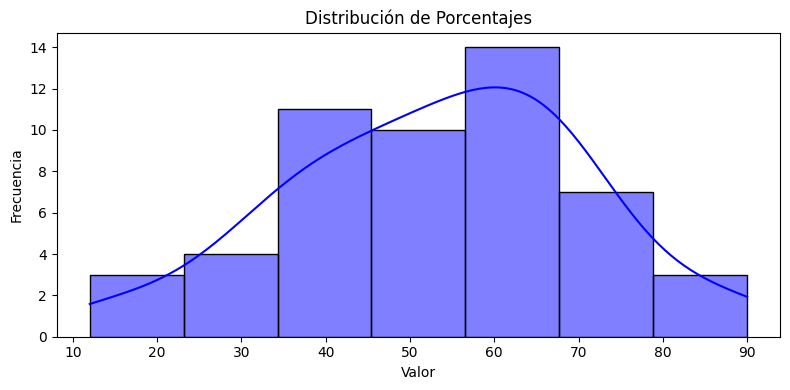

Asimetría de 'valor': -0.214



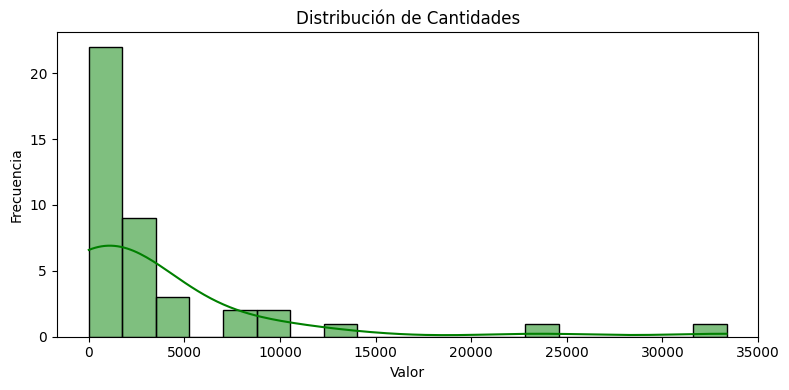

Asimetría de 'valor': 3.195



In [58]:
def analizar_distribucion(df, columna, titulo, color):
    #Muestra histograma con KDE y calcula la asimetria de una columna numérica
    plt.figure(figsize=(8, 4))
    sns.histplot(df[columna], kde=True, color=color)
    plt.title(titulo)
    plt.xlabel(columna.capitalize())
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    asimetria = df[columna].skew()
    print(f"Asimetría de '{columna}': {asimetria:.3f}\n")

analizar_distribucion(df_porcentajes, 'valor', 'Distribución de Porcentajes', 'blue')
analizar_distribucion(df_cantidades, 'valor', 'Distribución de Cantidades', 'green')

*   Nota: Existe asimetria por la derecha en las "Cantidades", esto nos perjudica en la creacion del modelo predictivo ya que algunos como regresion logistica o SVM no toleran la asimetria, es decir, asumen distribucion normal en los datos. Solucion: Averiguar si se pueden eliminar los outliers sin eliminar datos importantes o usar tecnicas como np.log o np.sqrt para reducir asimetria



---



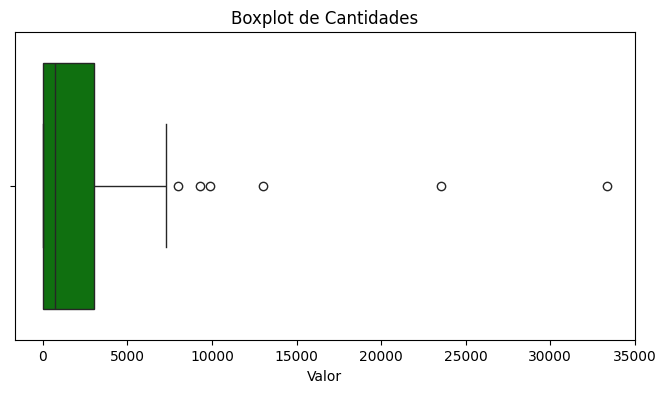

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cantidades['valor'], color='green')
plt.title('Boxplot de Cantidades')
plt.xlabel('Valor')
plt.show()

In [14]:
# Justificacion porque son outliers (IQR)
Q1 = df_cantidades['valor'].quantile(0.25)
Q3 = df_cantidades['valor'].quantile(0.75)
IQR = Q3 - Q1
lim_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lim superior: {lim_superior:.2f}")

# Informacion outliers
outliers = df_cantidades[(df_cantidades['valor'] > lim_superior)]
outliers

Q1: 4.90
Q3: 3041.00
IQR: 3036.10
Lim superior: 7595.15


,anio,nivel,instituto,tipo_estudiante,genero,metrica,valor
0,2021-01-01,General,UNAHUR,Todos,Todos,total_matricula,33352.0
5,2021-01-01,Pregrado y Grado,UNAHUR,Todos,Todos,cantidad_no_regularizo_ni_aprobo,13040.0
8,2021-01-01,Pregrado,UNAHUR,Todos,Todos,total_estudiantes,9268.0
47,2021-01-01,Grado,UNAHUR,Todos,Todos,total_estudiantes,23533.0
48,2021-01-01,Grado,Educación,Todos,Todos,total_estudiantes,9890.0
49,2021-01-01,Grado,Salud Comunitaria,Todos,Todos,total_estudiantes,7983.0


*   Nota: Realmente los outliers son relevantes ya que el total de matricula nos brinda un contexto amplio, cantidad de estudiantes que no aprobaron ni regularizaron permite identificar posibles causas de la desercion. y la cantidad de alumnos en los diferentes institutos permite responder preguntas nuevas como: En que instituto suele haber mas desercion estudiantil?. Solucion: usar log o raiz cuadrada.

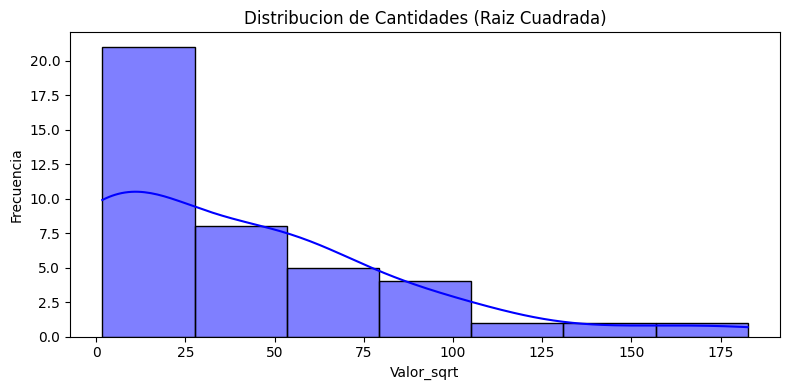

Asimetría de 'valor_sqrt': 1.385



In [60]:
df_cantidades['valor_sqrt'] = np.sqrt(df_cantidades['valor'])
analizar_distribucion(df_cantidades, 'valor_sqrt', 'Distribucion de Cantidades (Raiz Cuadrada)', 'blue')

*   Nota: $$\text{Reduccion Asimetrica} = \frac{3.19 - 1.38}{3.19} \times 100 = 56.73\%$$ La asimetria bajo bastante, pero no significa que es buena senial hasta ver como se comporta el modelo predictivo, quizas lo tolera o haga falta de bajar mas la asimetria



---



#5. Analisis Univariado

In [45]:
metricas = df['metrica'].unique()
metricas

array(['total_matricula', 'porcentaje_inscriptos_a_materias',
       'porcentaje_no_inscriptos_a_materias',
       'porcentaje_regularizo_o_aprobo',
       'porcentaje_no_regularizo_ni_aprobo',
       'cantidad_no_regularizo_ni_aprobo',
       'porcentaje_se_inscribio_a_materia',
       'porcentaje_no_se_inscribio_a_materia', 'total_estudiantes',
       'promedio_materias_aprobadas', 'promedio_materias_regularizadas',
       'porcentaje_aprobaron', 'porcentaje_regularizaron',
       'porcentaje_inscriptos_y_no_regularizaron',
       'porcentaje_no_se_inscribieron_a_materias',
       'promedio_materias_aprobadas_y_regularizadas',
       'porcentaje_continuaron_en_2022'], dtype=object)

Resumen Metricas a Analizar:

Análisis de: total_matricula
------------------------------
Análisis de: porcentaje_inscriptos_a_materias
------------------------------
Análisis de: porcentaje_no_inscriptos_a_materias
------------------------------
Análisis de: porcentaje_regularizo_o_aprobo
------------------------------
Análisis de: porcentaje_no_regularizo_ni_aprobo
------------------------------
Análisis de: cantidad_no_regularizo_ni_aprobo
------------------------------
Análisis de: porcentaje_se_inscribio_a_materia
------------------------------
Análisis de: porcentaje_no_se_inscribio_a_materia
------------------------------
Análisis de: total_estudiantes


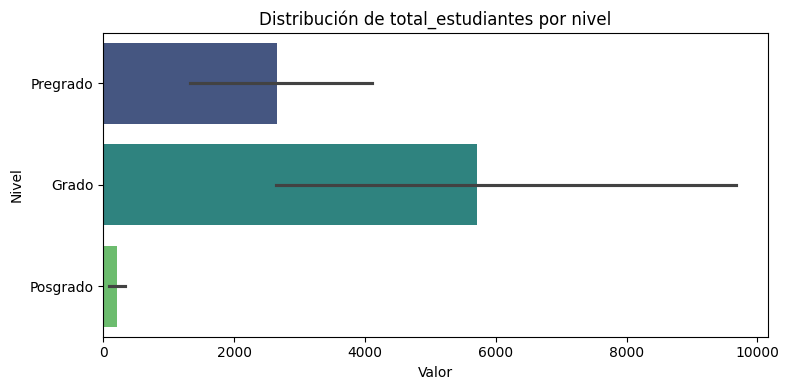

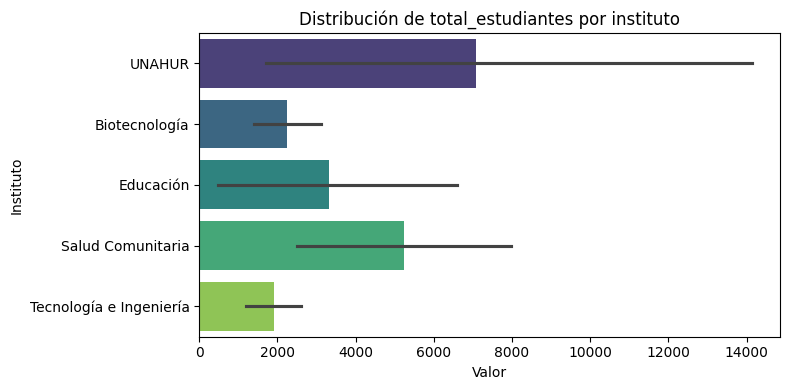

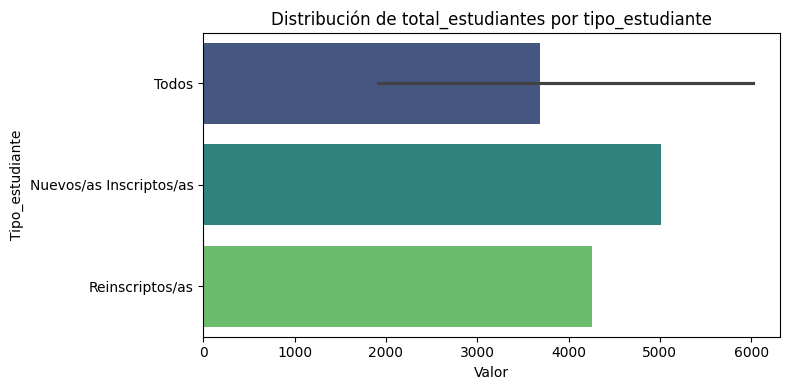

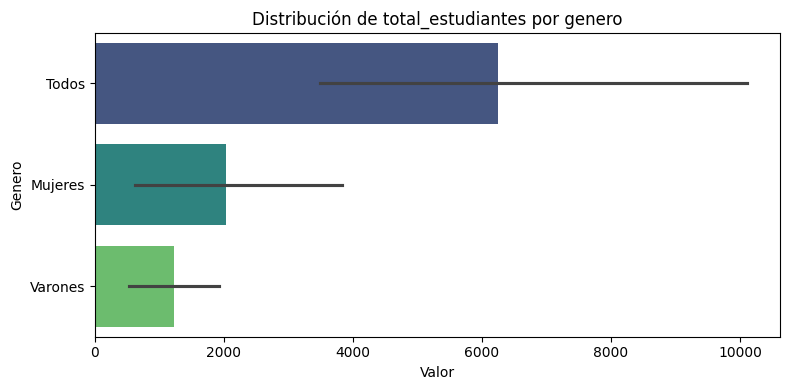

------------------------------
Análisis de: promedio_materias_aprobadas


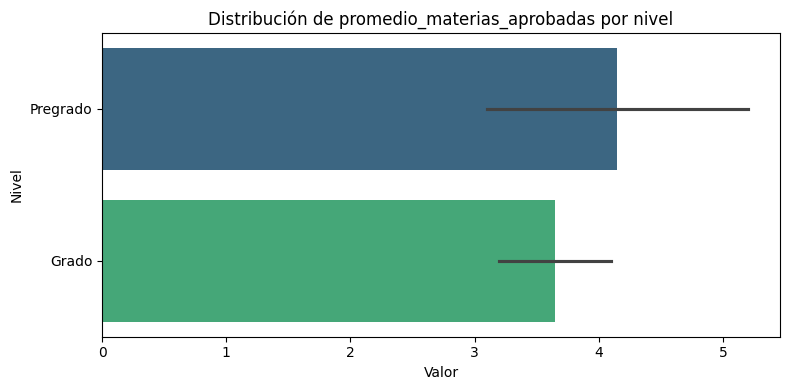

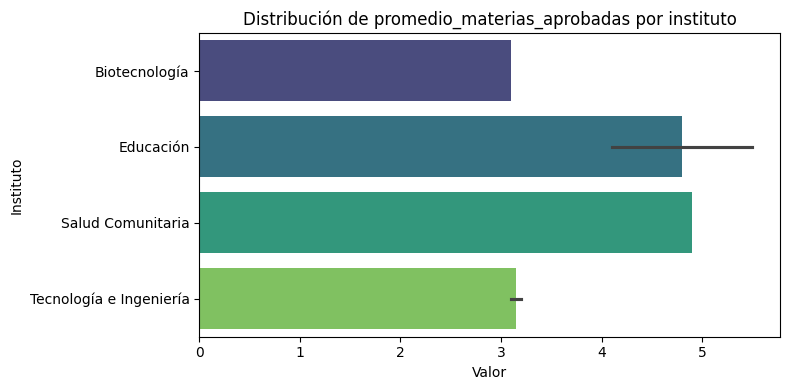

------------------------------
Análisis de: promedio_materias_regularizadas


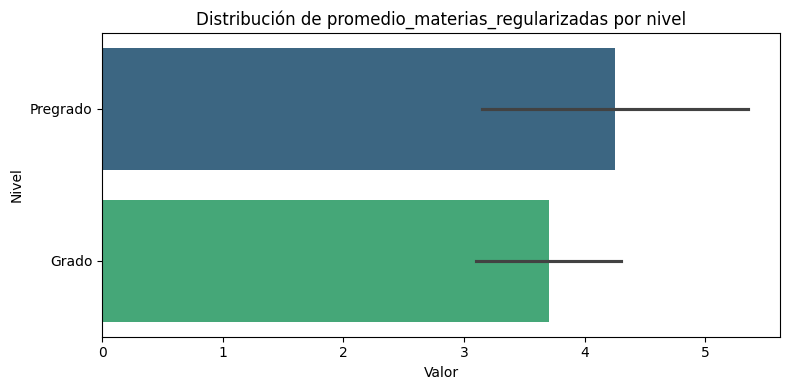

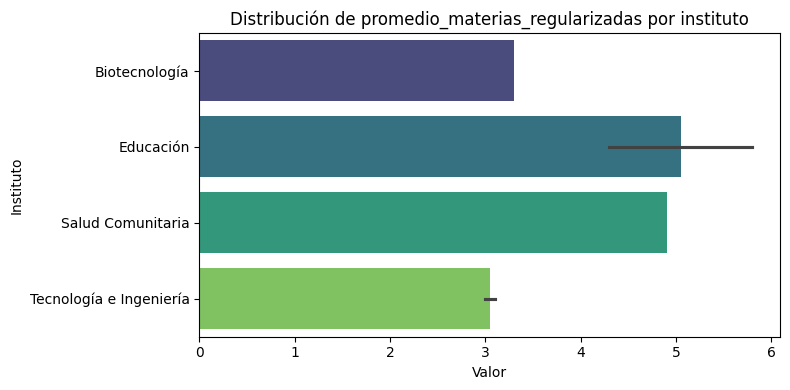

------------------------------
Análisis de: porcentaje_aprobaron


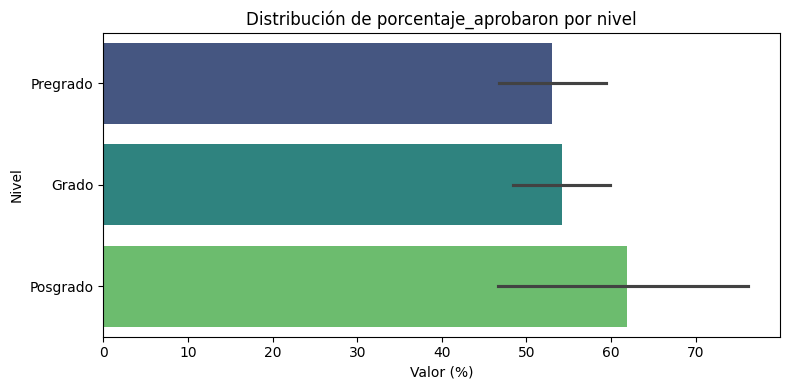

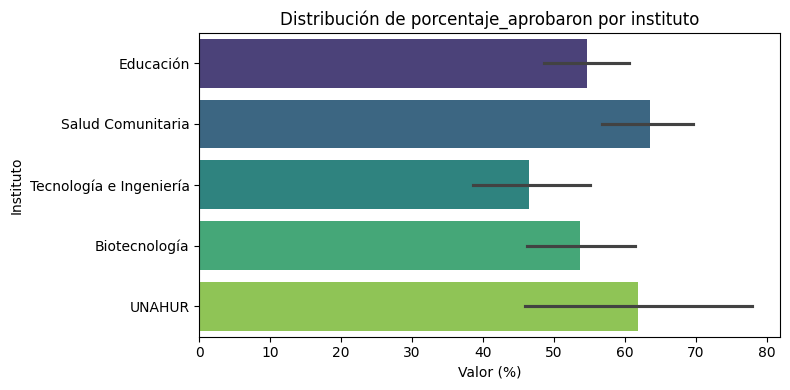

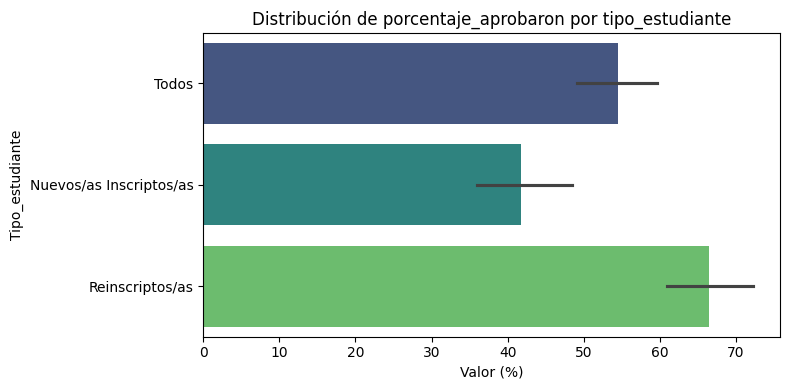

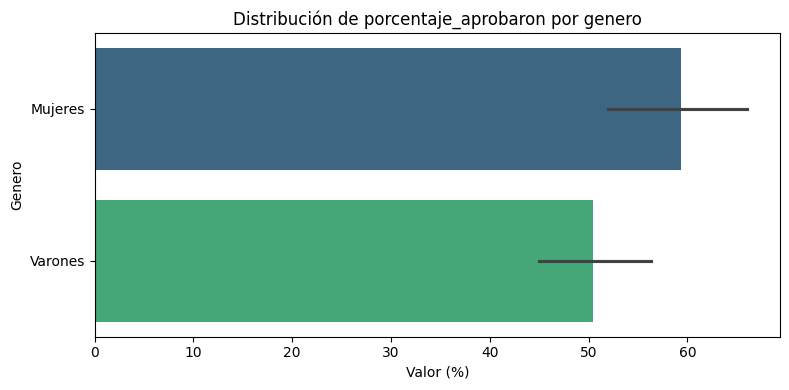

------------------------------
Análisis de: porcentaje_regularizaron


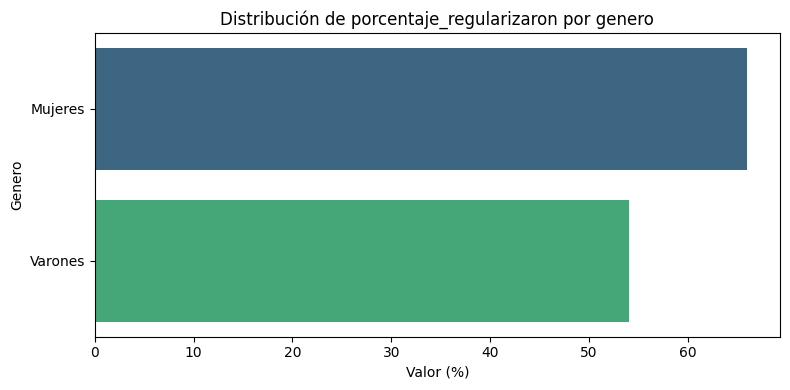

------------------------------
Análisis de: porcentaje_inscriptos_y_no_regularizaron


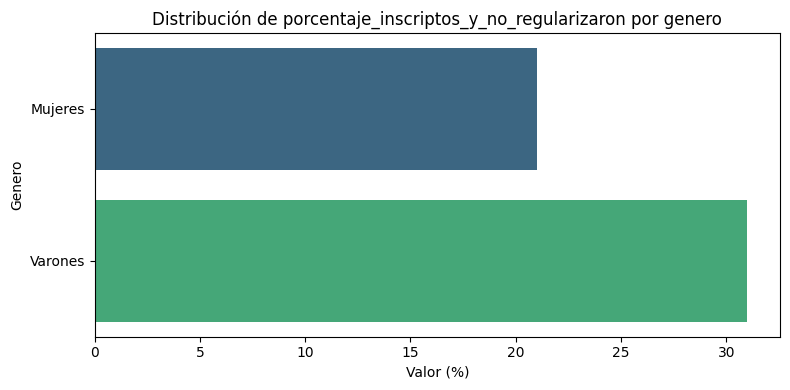

------------------------------
Análisis de: porcentaje_no_se_inscribieron_a_materias


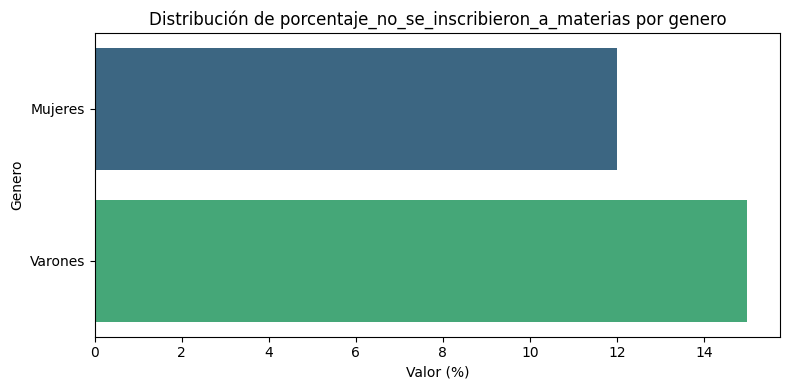

------------------------------
Análisis de: promedio_materias_aprobadas_y_regularizadas
------------------------------
Análisis de: porcentaje_continuaron_en_2022


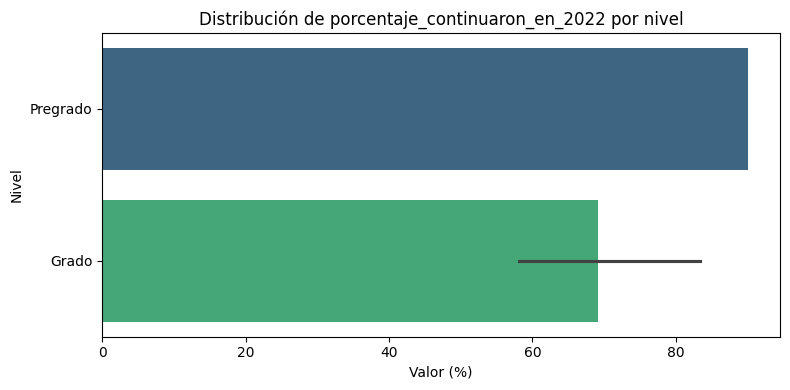

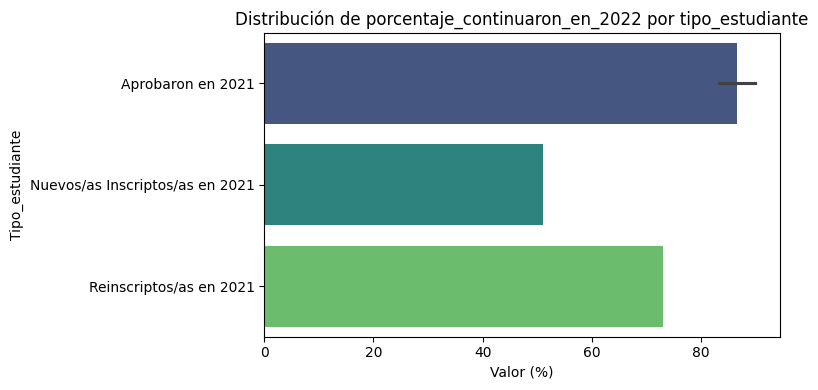

------------------------------


In [16]:
def graficar_univariado(df, metrica, columnas_categoricas, es_porcentaje):
    df_filtrado = df[df['metrica'] == metrica] # filtro por metrica
    for col in columnas_categoricas:
        if df_filtrado[col].nunique() > 1: # verificar que se pueda hacer grafico comparativo
            plt.figure(figsize=(8, 4))
            sns.barplot(data=df_filtrado, x='valor', y=col, palette='viridis')
            plt.title(f'Distribución de {metrica} por {col}')
            plt.xlabel('Valor (%)' if es_porcentaje else 'Valor')
            plt.ylabel(col.capitalize())
            plt.tight_layout()
            plt.show()

columnas_categoricas = ['nivel', 'instituto', 'tipo_estudiante', 'genero']
print("Resumen Metricas a Analizar:\n")

# cada metrica analizada por todas las cols categoricas
for metrica in df['metrica'].unique():
    print(f"Análisis de: {metrica}")
    graficar_univariado(
        df,
        metrica,
        columnas_categoricas,
        metrica in df_porcentajes['metrica'].unique() # evalua si el valor es porcentaje o no
    )
    print("-" * 30)


Análisis univariado de: porcentaje_aprobaron


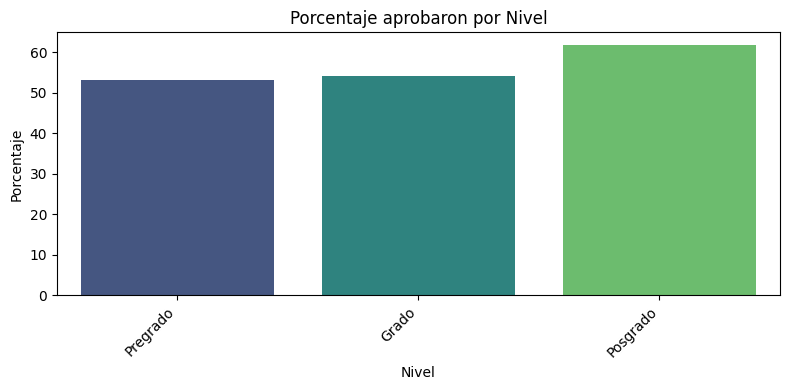

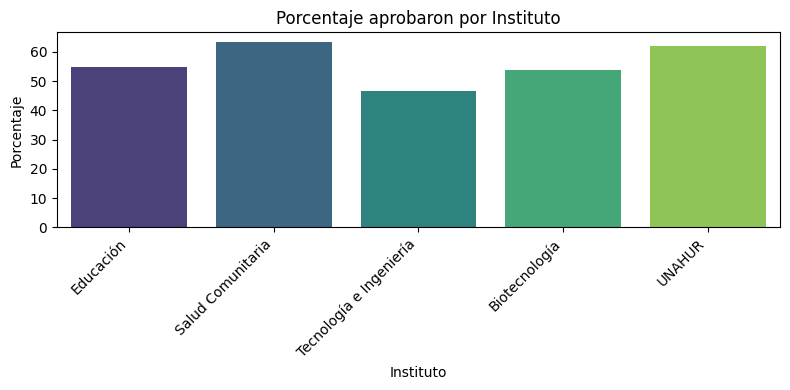

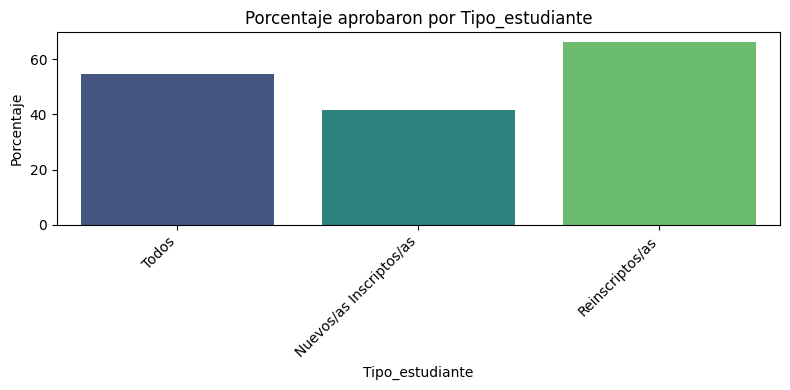

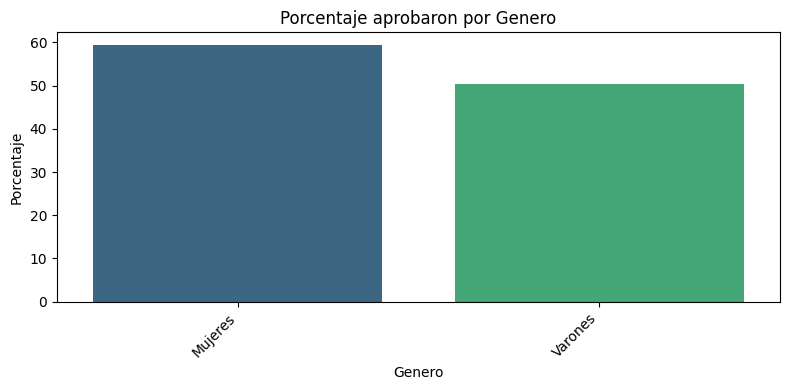

------------------------------

Análisis univariado de: porcentaje_no_inscriptos_a_materias


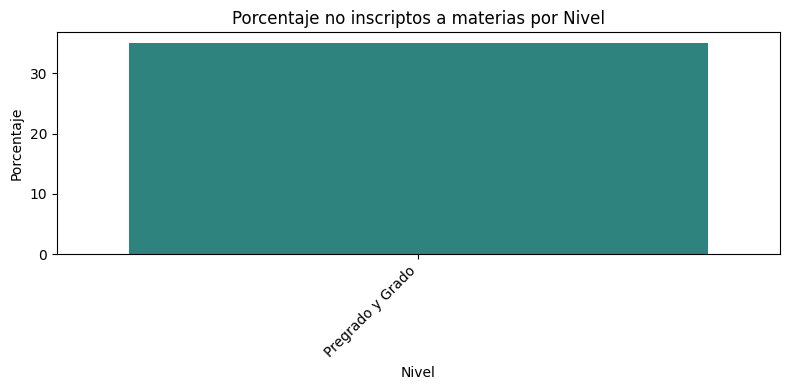

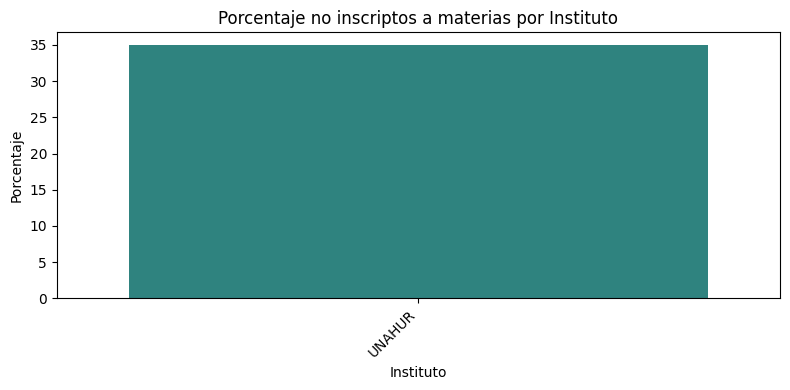

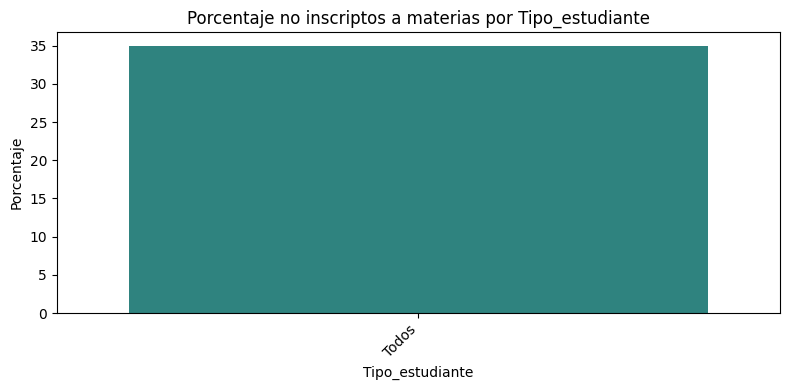

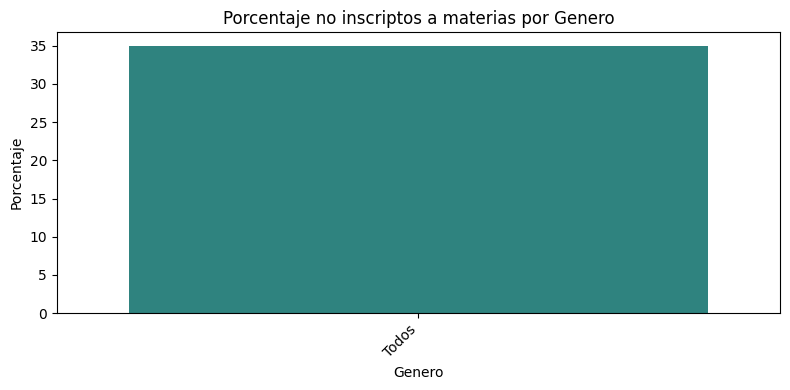

------------------------------

Análisis univariado de: porcentaje_no_se_inscribio_a_materia


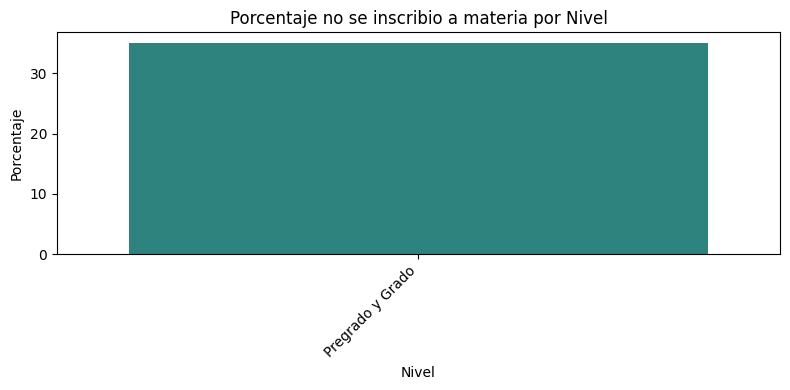

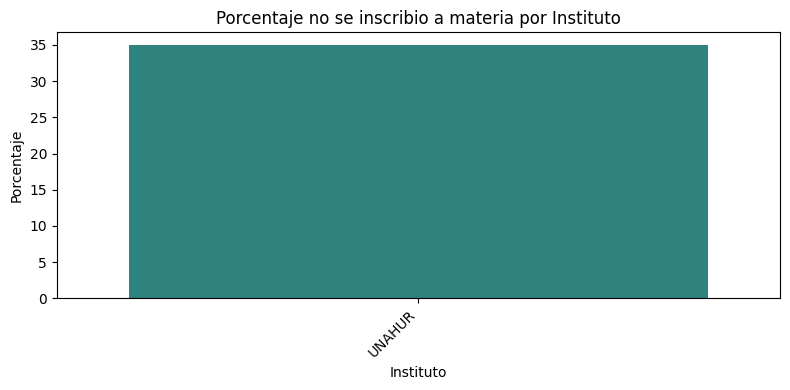

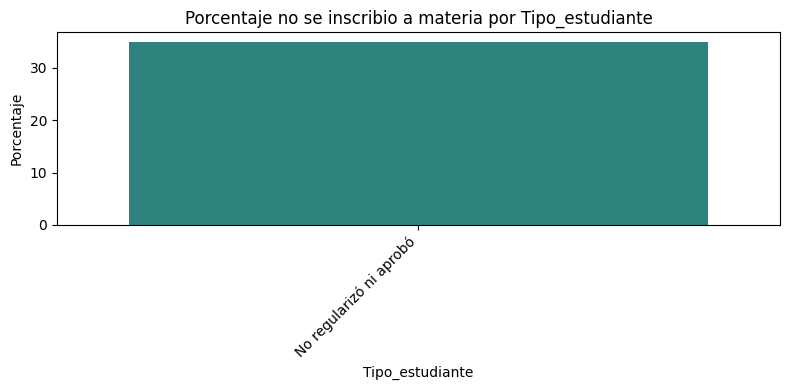

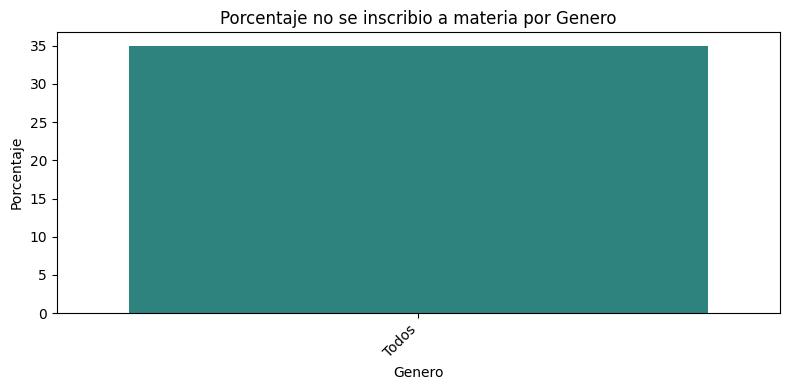

------------------------------

Análisis univariado de: porcentaje_inscriptos_y_no_regularizaron


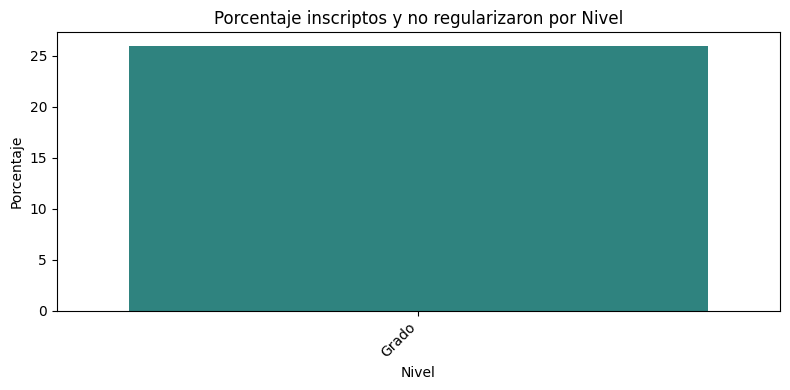

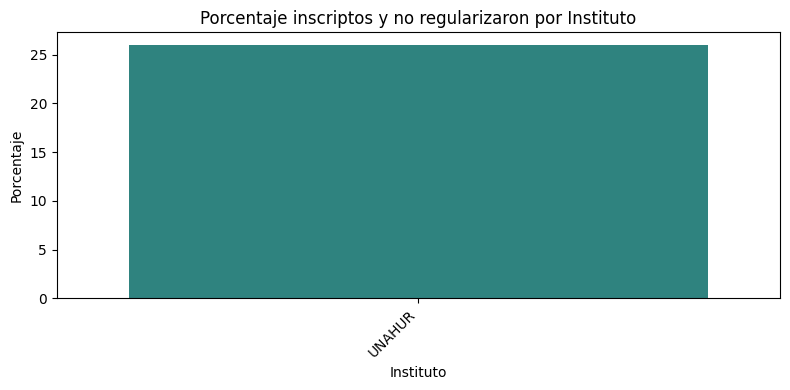

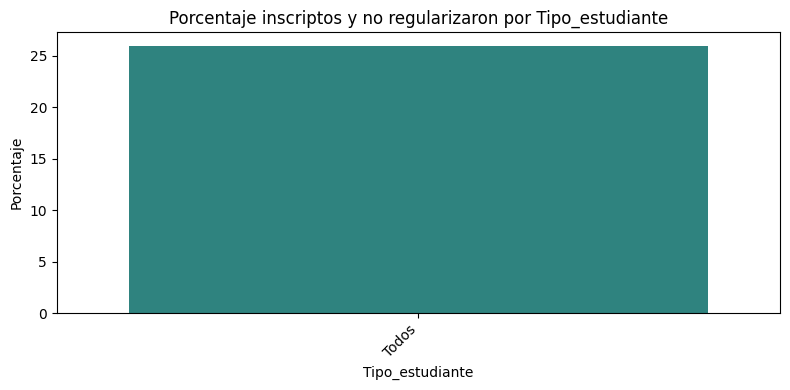

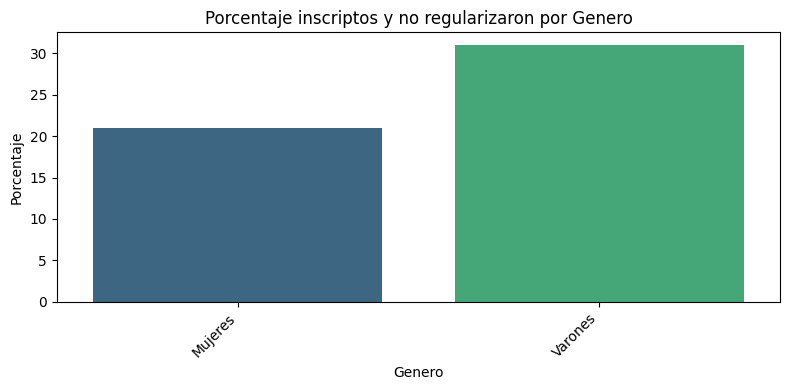

------------------------------

Análisis univariado de: porcentaje_no_se_inscribieron_a_materias


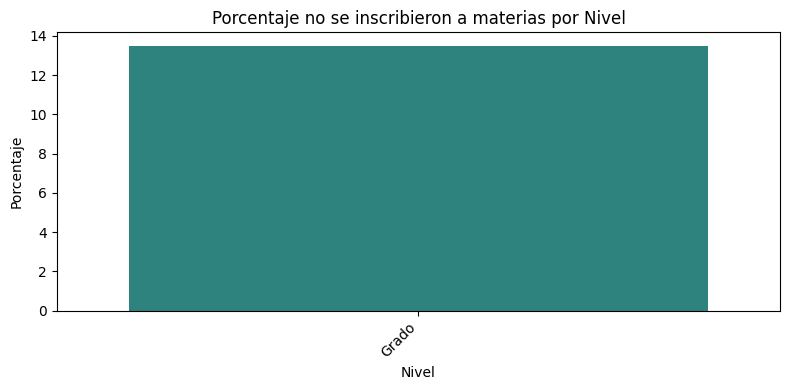

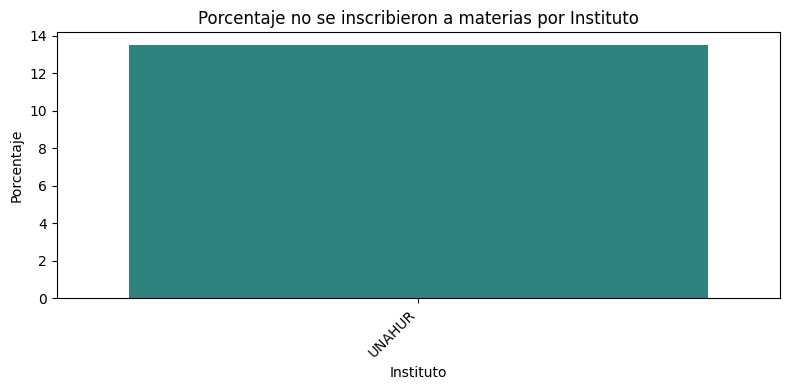

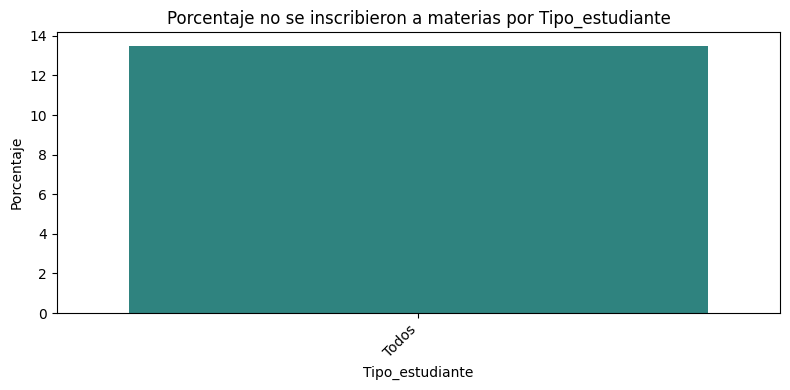

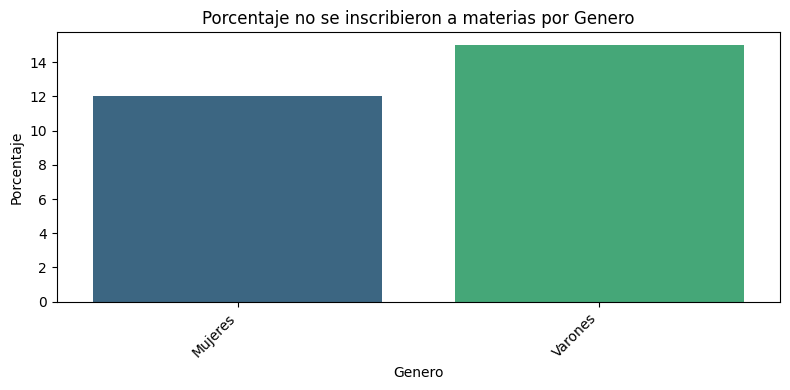

------------------------------


In [43]:
def graficos_univariado_modelo(df, metrica, categorias, es_porcentaje=True):
    # Genera gráficos univariados para una métrica cruzada con variables categóricas
    for cat in categorias:
        plt.figure(figsize=(8, 4))
        data = df[df['metrica'] == metrica]
        sns.barplot(data=data, x=cat, y='valor', estimator='mean', ci=None, palette='viridis')
        plt.title(f"{metrica.replace('_', ' ').capitalize()} por {cat.capitalize()}")
        plt.xlabel(cat.capitalize())
        plt.ylabel('Porcentaje' if es_porcentaje else 'Valor')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

metricas_para_univariado = [
    'porcentaje_aprobaron',
    'porcentaje_no_inscriptos_a_materias',
    'porcentaje_no_se_inscribio_a_materia',
    'porcentaje_inscriptos_y_no_regularizaron',
    'porcentaje_no_se_inscribieron_a_materias',
]

for metrica in metricas_para_univariado:
    print(f"\nAnálisis univariado de: {metrica}")
    es_porcentaje = metrica in df_porcentajes['metrica'].unique()
    graficos_univariado_modelo(df, metrica, columnas_categoricas, es_porcentaje)
    print("-" * 30)

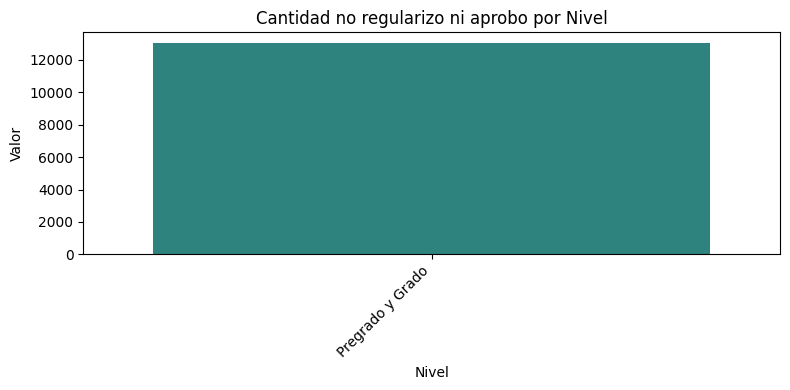

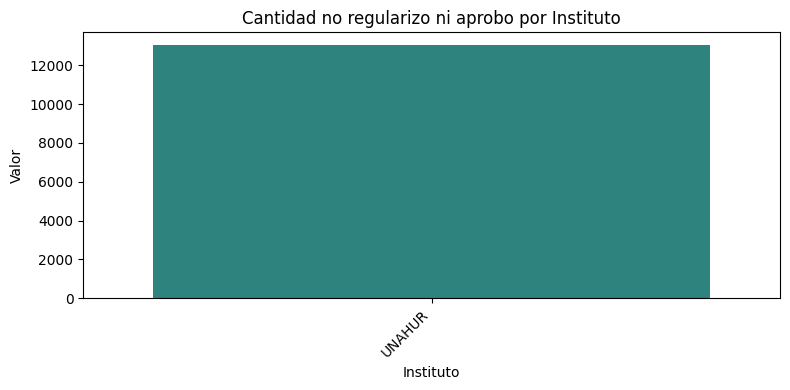

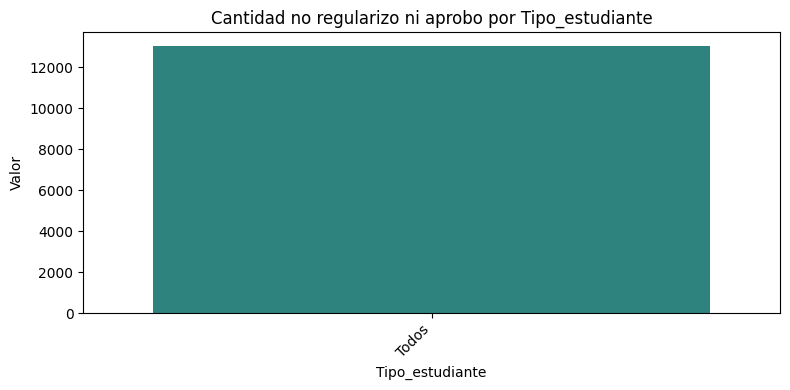

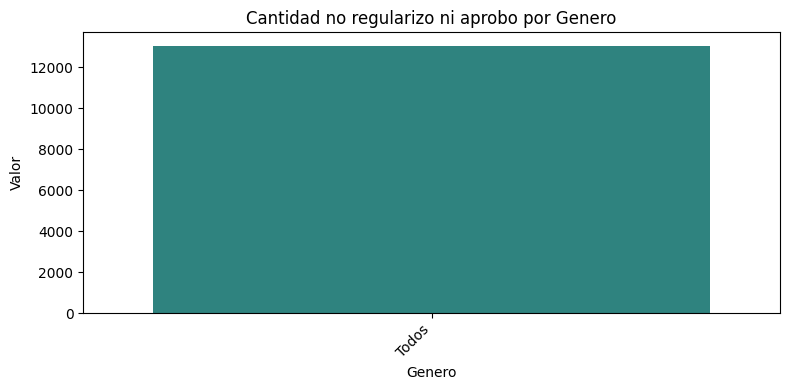

In [55]:
graficos_univariado_modelo(
    df_cantidades,
    'cantidad_no_regularizo_ni_aprobo',
    columnas_categoricas,
    es_porcentaje=False
)

*   Aclaracion: Algunos graficos no tienen mucho sentido debido a que no cuento con la base de datos de la universidad. Estos graficos intentan acercarse a los datos reales teniendo en cuenta los recursos que tengo a disposicion (pdf informe rendimiento estudiantes). Por otra parte, los graficos de una sola barra se deben a que existe una sola variable en cada columna categorica porque se filtro por metrica

#6. Analisis Multivariado

In [46]:
metricas = df['metrica'].unique()
metricas

array(['total_matricula', 'porcentaje_inscriptos_a_materias',
       'porcentaje_no_inscriptos_a_materias',
       'porcentaje_regularizo_o_aprobo',
       'porcentaje_no_regularizo_ni_aprobo',
       'cantidad_no_regularizo_ni_aprobo',
       'porcentaje_se_inscribio_a_materia',
       'porcentaje_no_se_inscribio_a_materia', 'total_estudiantes',
       'promedio_materias_aprobadas', 'promedio_materias_regularizadas',
       'porcentaje_aprobaron', 'porcentaje_regularizaron',
       'porcentaje_inscriptos_y_no_regularizaron',
       'porcentaje_no_se_inscribieron_a_materias',
       'promedio_materias_aprobadas_y_regularizadas',
       'porcentaje_continuaron_en_2022'], dtype=object)

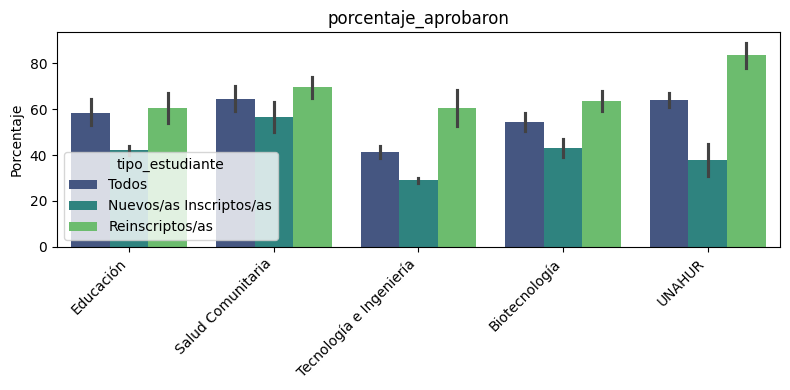

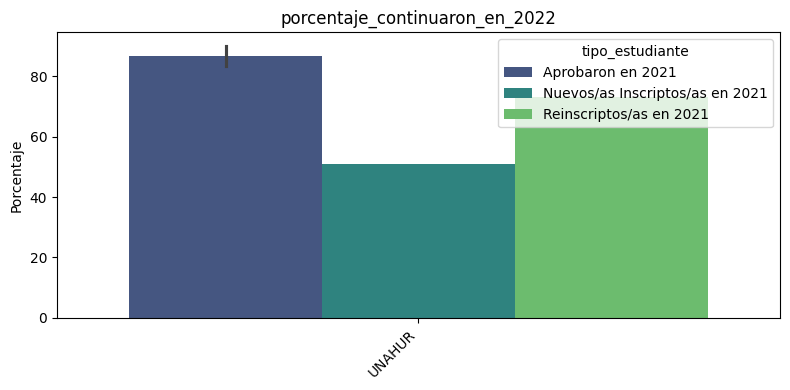

In [56]:
def graficar_barras(df, metrica, x, hue, titulo, ylabel):
    """
    Genera un gráfico de barras para una métrica específica.
    """
    data = df[df['metrica'] == metrica]
    plt.figure(figsize=(8, 4))
    sns.barplot(data=data, x=x, y='valor', hue=hue, palette='viridis')
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

metricas_multivariado = ["porcentaje_aprobaron", "porcentaje_continuaron_en_2022"]

for m in metricas_multivariado:
  graficar_barras(
    df_porcentajes,
    metrica=m,
    x='instituto',
    hue='tipo_estudiante',
    titulo=m,
    ylabel='Porcentaje'
)

#Conclusiones

**Sobre las Preguntas Clave:**

*   **Que Instituto presenta los mayores desafios de rendimiento?**
    Los graficos de "porcentaje\_aprobaron" por instituto, parece que el Instituto de Tecnologia e Ingenieria presenta mayores desafíos en terminos de tasas de aprobacion en comparación con otros institutos, especialmente para los nuevos inscriptos. Puede deberse a varios motivos pero el mas acertado seria por la naturaleza de la dificultad de las materias y la necesidad de mayor apoyo academico

*   **Existen diferencias de rendimiento y continuidad entre hombres y mujeres?**
    Se muestran algunas diferencias en el grafico "Porcentaje\_aprobaron\_por\_genero", donde los hombres estan debajo de las mujeres. Estas diferencias pueden variar dependiendo del instituto y el tipo de estudiante. Es necesario enriquecer los datos para investigar mas a profundo esa brecha

*   **Cual es el perfil de estudiante con mayor tasa de abandono y bajo rendimiento?**
    Metricas como "porcentaje\_no\_inscriptos\_a\_materias", "porcentaje\_no\_se\_inscribio\_a\_materia" y "cantidad\_no\_regularizo\_ni\_aprobo", segmentado por "tipo\_estudiante", informa que los "Nuevos/as Inscriptos/as" tienen mayores tasas de no inscripcion o no regularizacion/aprobacion en comparacion con los "Reinscriptos/as". El porque es algo obvio, los reinscriptos ya pasaron por lo mismo y es poco probable que vuelvan a abandonar o tener malos rendimientos sabiendo que ya cursaron materias que ya vieron

**Validación de Hipótesis:**

*   **H1: Los estudiantes reinscriptos/as tienen tasas de aprobación y continuidad considerablemente más altas que los nuevos/as inscriptos/as:**
    Los graficos de "porcentaje\_aprobaron" y "porcentaje\_continuaron\_en\_2022" por "tipo\_estudiante" respaldan esta hipotesis

*   **H2: El Instituto de Tecnologia e Ingenieria muestra las tasas de aprobacion mas baja:**
    El grafico de "porcentaje\_aprobaron" por "instituto" sugieren que Tecnologia e Ingenieria tiene tasas de aprobacion mas bajas en comparación con otros institutos, lo que valida esta hipotesis


*   **H3: La tasa de continuidad en 2022 esta relacionada con el porcentaje de aprobados:**
    Aunque se tiene graficos como "porcentaje\_continuaron\_en\_2022" y "porcentaje\_aprobaron", no se puede usar la correlacion debido ya que son solamente porcentajes. Se sugiere enriquecer mas los datos para buscar una relacion lineal entre ambas variables

**Observaciones:**

*   La limitacion de no contar con la base de datos completa de estudiantes restringe la profundidad del analisis
*   Seria ideal contar con datos a nivel de estudiante individual para mejorar el EDA y el modelo predictivo